In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('survey_data,csv')

data

,age,gender,total_income,expenses
0,30,Male,4000.00,"{'utilities': 200.0, 'entertainment': 300.0, '..."
1,25,Female,1500.00,"{'utilities': 200.0, 'entertainment': 100.0, '..."
2,35,Male,4210.52,"{'utilities': 215.3, 'entertainment': 372.4, '..."
3,35,Male,4210.52,"{'utilities': 215.3, 'entertainment': 372.4, '..."
4,29,Female,3104.11,"{'utilities': 187.8, 'entertainment': 289.1, '..."
5,45,Other,4987.75,"{'utilities': 251.9, 'entertainment': 153.2, '..."
6,23,Male,2021.34,"{'utilities': 118.6, 'entertainment': 304.7, '..."
7,38,Female,3890.25,"{'utilities': 278.2, 'entertainment': 375.9, '..."
8,41,Male,3157.88,"{'utilities': 264.3, 'entertainment': 125.4, '..."
9,56,Female,2705.43,"{'utilities': 150.0, 'entertainment': 199.6, '..."


In [3]:
# Normalize the 'expenses' column
expenses_df = pd.json_normalize(data['expenses'].apply(eval)) 

data = pd.concat([data, expenses_df], axis=1)

data.drop(columns=['expenses'], inplace=True)

data.head()

,age,gender,total_income,utilities,entertainment,school_fees,shopping,healthcare
0,30,Male,4000.00,200.0,300.0,1200.0,400.0,600.0
1,25,Female,1500.00,200.0,100.0,500.0,300.0,150.0
2,35,Male,4210.52,215.3,372.4,1045.0,412.5,512.7
3,35,Male,4210.52,215.3,372.4,1045.0,412.5,512.7
4,29,Female,3104.11,187.8,289.1,801.3,341.2,620.6


## Visualising Ages with the Highest Income

In [5]:
income_by_age = data.groupby('age')['total_income'].sum()

income_by_age.head()

age
23    2021.34
25    1500.00
26    3348.57
28    1840.62
29    3104.11
Name: total_income, dtype: float64

In [6]:
max_income = income_by_age.max()
highest_income_ages = income_by_age[income_by_age == max_income]
highest_income_ages

age
30    8535.76
Name: total_income, dtype: float64

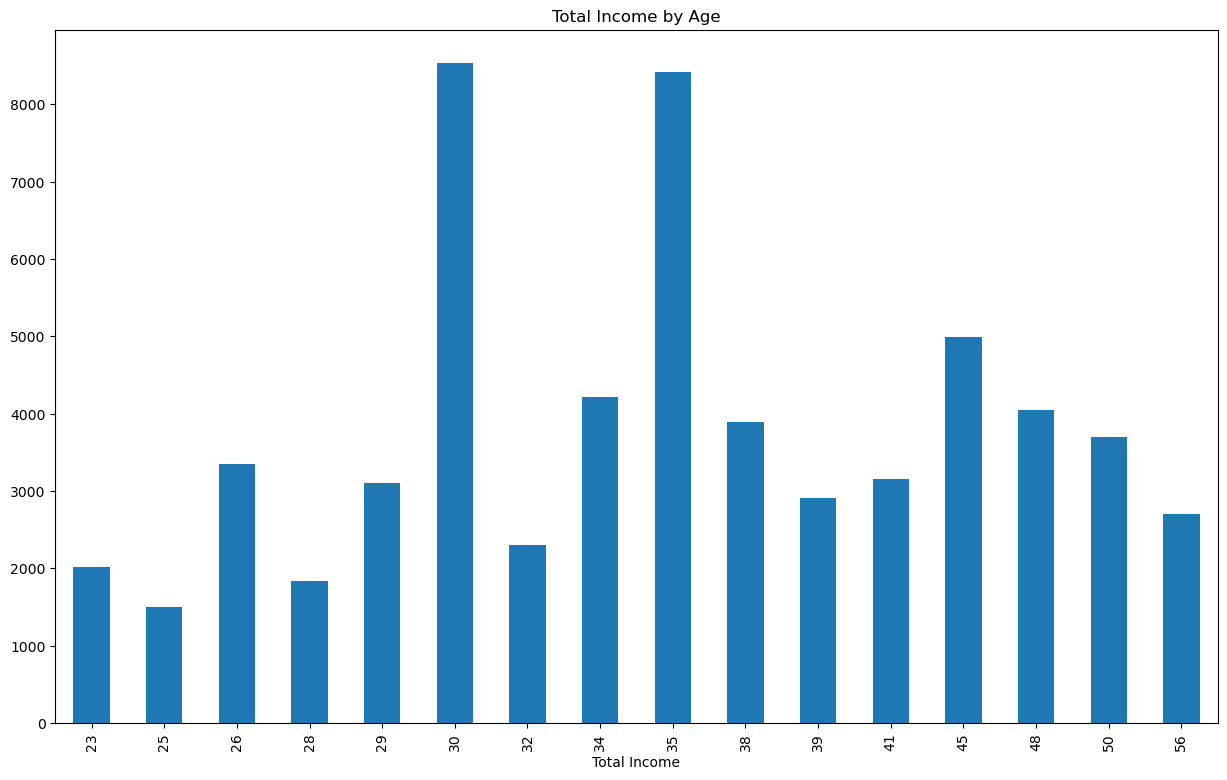

In [30]:
income_by_age.plot(kind='bar', title='Total Income by Age', figsize=(15,9))
plt.xlabel('Age`')
plt.xlabel('Total Income')
plt.show()

## Visualising Gender Distribution across Spending Categories

In [7]:
expense_columns = ['utilities', 'entertainment', 'school_fees', 'shopping', 'healthcare']
expense_data = data.melt(id_vars=['gender'], value_vars=expense_columns, var_name='Category', value_name='Amount')

expense_data

,gender,Category,Amount
0,Male,utilities,200.0
1,Female,utilities,200.0
2,Male,utilities,215.3
3,Male,utilities,215.3
4,Female,utilities,187.8
...,...,...,...
85,Male,healthcare,421.7
86,Female,healthcare,583.0
87,Other,healthcare,345.5
88,Male,healthcare,718.2


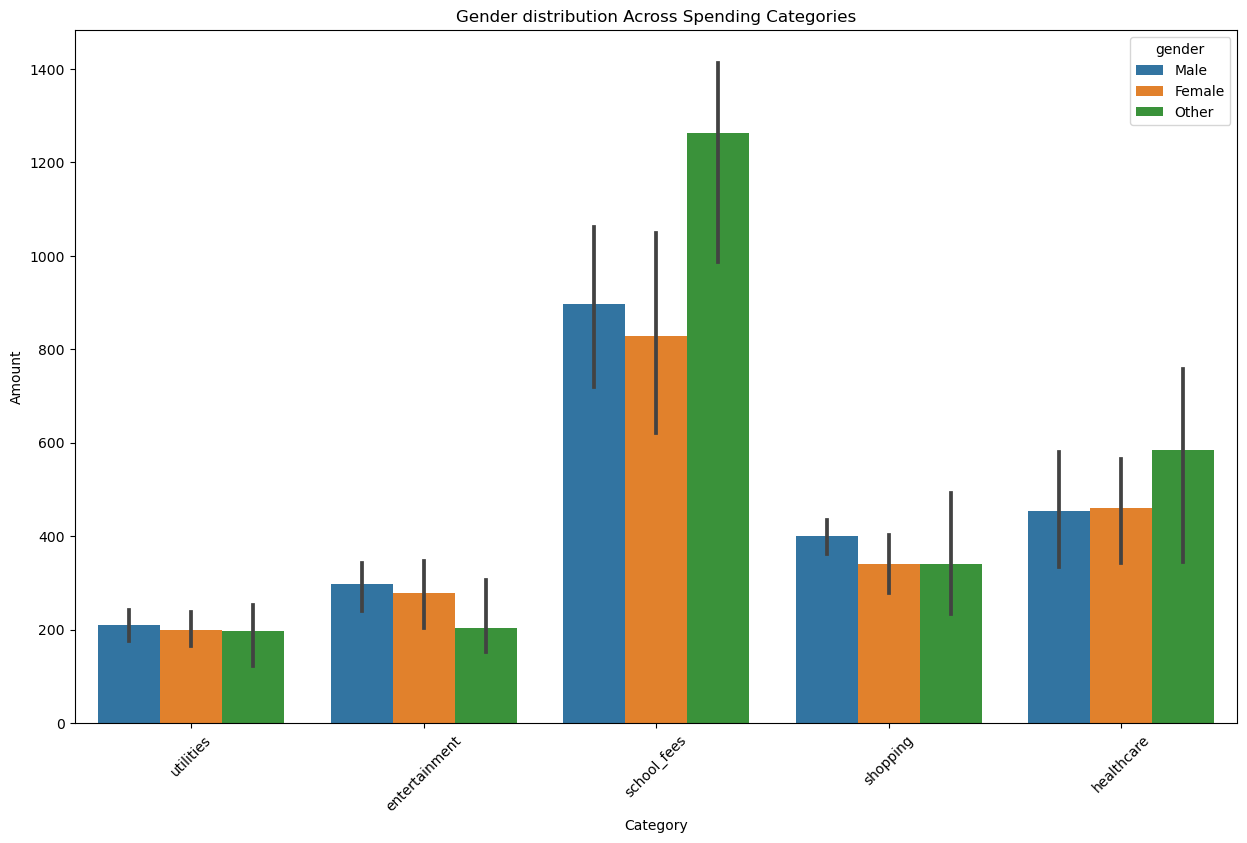

In [14]:
plt.figure(figsize=(15,9))
sns.barplot(data=expense_data, x='Category', y='Amount', hue='gender')
plt.title('Gender distribution Across Spending Categories')
plt.xticks(rotation=45)
plt.show()

## Exporting the charts for use in PowerPoint

In [17]:
income_by_age.plot(kind='bar', title='Total Income by Age', figsize=(15, 9))
plt.xlabel('Age')
plt.ylabel('Total Income')
plt.savefig('age_income_chart.png') 
plt.close()


plt.figure(figsize=(15,9))
sns.barplot(data=expense_data, x='Category', y='Amount', hue='gender')
plt.title('Gender distribution Across Spending Categories')
plt.xticks(rotation=45)
plt.savefig('gender_spending_chart.png')
plt.close()
